## Churn prediction analysis

In [1]:
# Import all the libraries
import numpy as np 
import pandas as pd 
import missingno

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline


import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization

## Data Exploration

In [2]:
telcom = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [202]:
print("Number of rows:/",telcom.shape[0])
print("\n Number of columns:/",telcom.shape[1])
print("\n Columns name:/ ",telcom.columns.to_list())
print("Unique values:/ ",telcom.nunique())

Number of rows:/ 7043

 Number of columns:/ 21

 Columns name:/  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Unique values:/  customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


<AxesSubplot:>

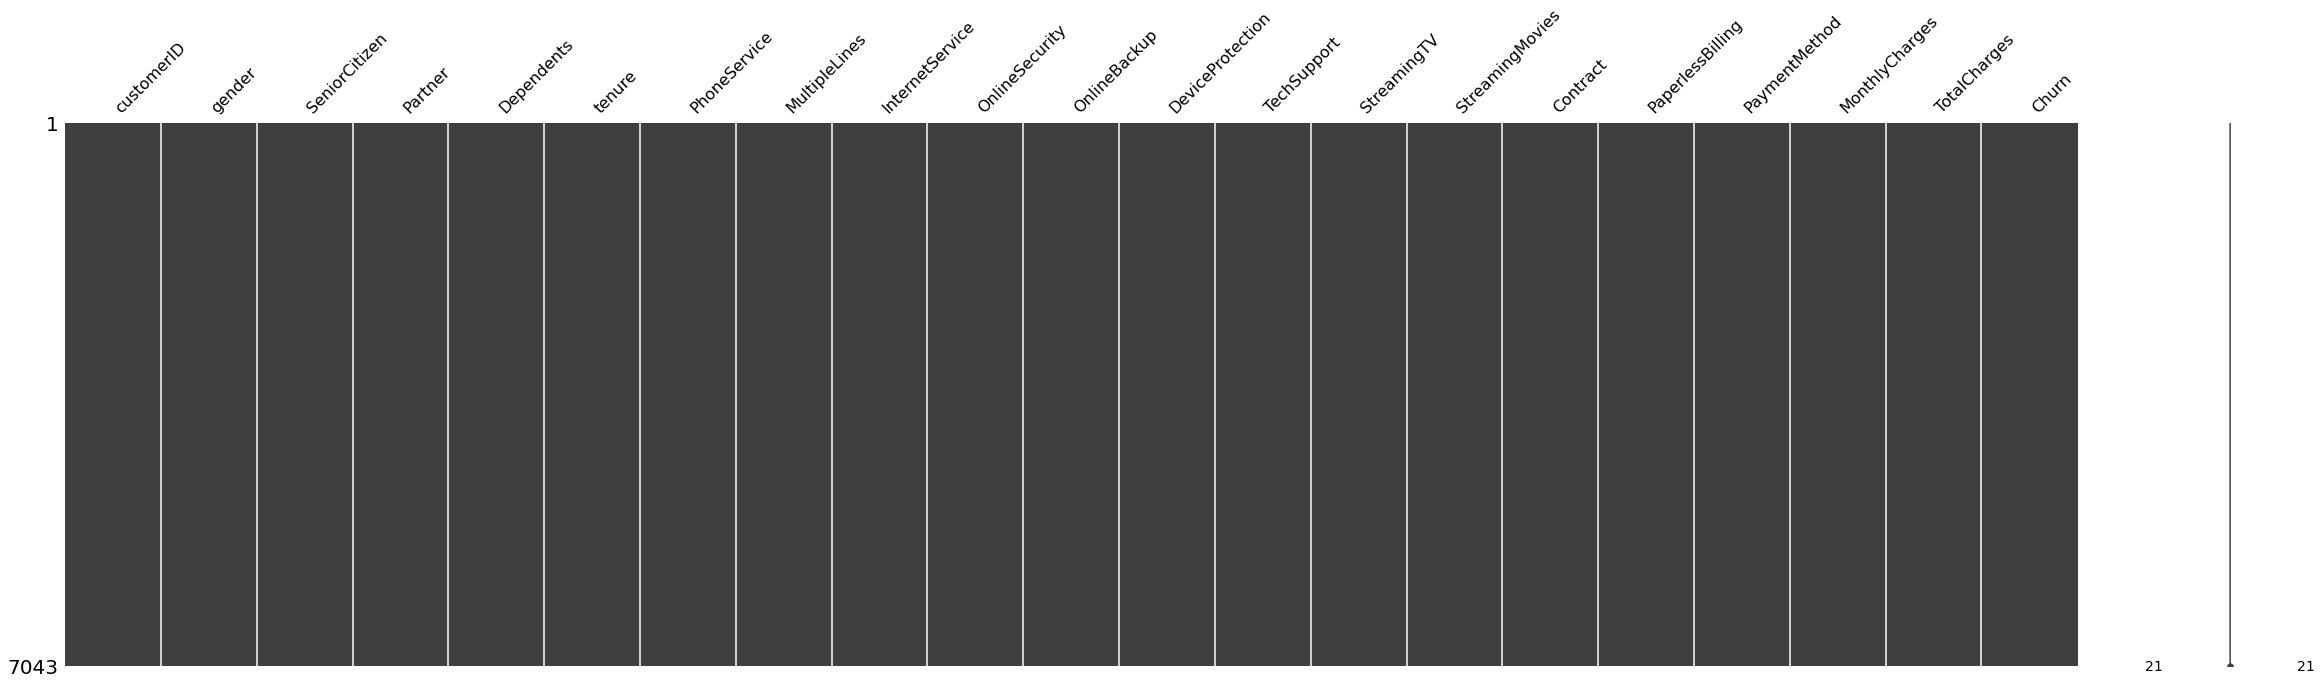

In [5]:
missingno.matrix(telcom,figsize=(40,10))

In [204]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Missing values

In [6]:
def missing_val_fun(dset,columns):
    missing_v={}
    print("The missing values checking")
    values_all=len(dset)
    for mvc in columns:
        mvalues=dset[mvc].value_counts().sum()
        missing_v[mvc]=values_all-mvalues
    return missing_v

In [7]:
mv=missing_val_fun(telcom,columns=telcom.columns)
mv

The missing values checking


{'customerID': 0,
 'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'MultipleLines': 0,
 'InternetService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'PaperlessBilling': 0,
 'PaymentMethod': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 0,
 'Churn': 0}

In [8]:
telcom = telcom.replace(" ", np.NaN)

In [9]:
mv=missing_val_fun(telcom,columns=telcom.columns)
mv

The missing values checking


{'customerID': 0,
 'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'MultipleLines': 0,
 'InternetService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'PaperlessBilling': 0,
 'PaymentMethod': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 11,
 'Churn': 0}

### Feature Engeenering

In [10]:
telcom=telcom.dropna(subset=['TotalCharges'])

In [11]:
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

In [12]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
telcom.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [143]:
for n in telcom:
    print(n)
    print(telcom[n].value_counts())
    print("")

customerID
0970-ETWGE    1
7108-DGVUU    1
9821-POOTN    1
6152-ONASV    1
6508-NJYRO    1
             ..
8364-TRMMK    1
2961-VNFKL    1
7975-TZMLR    1
1216-BGTSP    1
6502-HCJTI    1
Name: customerID, Length: 7032, dtype: int64

gender
Male      3549
Female    3483
Name: gender, dtype: int64

SeniorCitizen
0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Partner
No     3639
Yes    3393
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

OnlineSecurity
No                     34

In [14]:
#Replace 'No internet service' to 'No' for the following 6 columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [15]:
#replace values in Senior Citizen column
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [16]:
telcom.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [17]:
# Convert Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [18]:
telcom.tenure_group.unique()

array(['Tenure_0-12', 'Tenure_24-48', 'Tenure_12-24', 'Tenure_gt_60',
       'Tenure_48-60'], dtype=object)

In [19]:
telcom.tenure_group.head()

0     Tenure_0-12
1    Tenure_24-48
2     Tenure_0-12
3    Tenure_24-48
4     Tenure_0-12
Name: tenure_group, dtype: object

In [20]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [21]:
telcom.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


### Dependent Variable Variable of Interest is (Churn)

In [22]:
telcom['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [23]:
telcom['Churn']=np.where(telcom['Churn']=="No",0,1)

In [24]:
churn= telcom[telcom['Churn']==1]
notchurn= telcom[telcom['Churn']==0]

In [25]:
print("People who left: ", len(churn))
print("People who stayed: ", len(notchurn))

People who left:  1869
People who stayed:  5163


<AxesSubplot:xlabel='count', ylabel='Churn'>

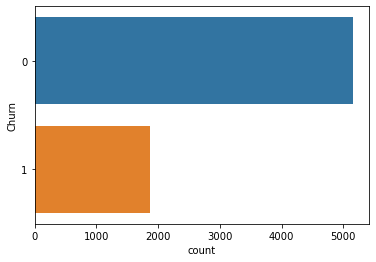

In [26]:
sns.countplot(data=telcom,y='Churn')

In [29]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ['Churn']
cat_cols   = telcom.keys().tolist()

In [30]:
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group']

In [31]:
cat_cols= telcom.nunique()[telcom.nunique() < 6].keys().tolist()

In [32]:
len(cat_cols)

18

In [33]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_group']

In [34]:
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [35]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [36]:
Id_col

['customerID']

In [164]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [37]:
target_col

['Churn']

### Numerical values visualization

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

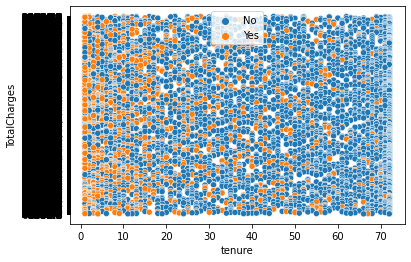

In [39]:
sns.scatterplot(data = telcom, x =telcom['tenure'], y = telcom['TotalCharges'], hue=telcom.Churn.tolist())

We can intrepret some findings as the following:-
- people are paying alot at the begining of the subscription as they expect high quality services.
- As we go further number of subscribers decrease while some people still paying high charges. thus might give indications that the services quality declined.

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

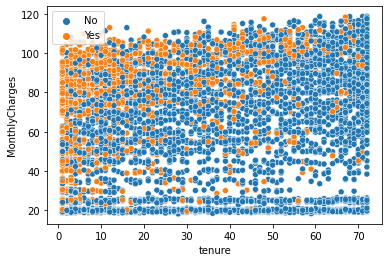

In [40]:
sns.scatterplot(data = telcom, x =telcom['tenure'], y = telcom['MonthlyCharges'], hue=telcom.Churn.tolist())

### Categorical Varibles distribution in Churn and Non-churn category

In [42]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = notchurn[column].value_counts().values.tolist(),
                    labels  = notchurn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [43]:
# for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

## Data Preprocessing

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [39]:
#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [40]:
bin_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [41]:
multi_cols

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'tenure_group']

In [42]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Encoding for multi value columns using get_dummies
telcom = pd.get_dummies(data = telcom,columns = multi_cols)

In [43]:
telcom.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [44]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [45]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [46]:
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [47]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,NaN,NaN,NaN
7039,2234-XADUH,0,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,1,NaN,NaN,NaN
7040,4801-JZAZL,0,0,1,1,0,1,0,0,0,...,1,0,1,0,0,0,0,NaN,NaN,NaN
7041,8361-LTMKD,1,1,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,NaN,NaN,NaN


In [48]:
summary = telcom.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7032.0,0.162400,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7032.0,0.482509,0.499729,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7032.0,0.298493,0.457629,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,7032.0,0.903299,0.295571,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7032.0,0.286547,0.452180,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7032.0,0.344852,0.475354,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7032.0,0.343857,0.475028,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7032.0,0.290102,0.453842,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,7032.0,0.384386,0.486484,0.000000,0.000000,0.000000,1.000000,1.000000


In [49]:
# Variables summery
summary = (telcom[[i for i in telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

## Correlation

In [50]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [52]:
corr_array=np.array(correlation)

In [53]:
correlation

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,...,0.000844,0.013199,-0.001050,-0.000649,-0.010516,-0.004319,0.016279,0.018568,0.006789,0.021080
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.105445,...,0.171322,-0.152987,-0.027713,0.001860,0.020383,0.014186,-0.002407,-0.004482,-0.001729,-0.005051
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.143346,0.141849,0.153556,0.120206,0.124483,...,-0.083207,-0.096948,-0.305061,-0.048481,0.028468,0.105341,0.280353,0.037100,-0.003828,0.026933
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.016499,...,-0.149274,0.056448,-0.145379,-0.001459,0.024645,0.031419,0.118090,0.021078,-0.000263,0.011245
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,...,0.002747,-0.004463,-0.006950,0.012307,-0.014778,-0.009750,0.020516,-0.006858,0.023473,0.004607
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,-0.091676,1.000000,0.283285,0.274875,0.354458,0.175514,...,-0.112295,-0.079918,-0.242409,-0.055662,0.007695,0.071663,0.263228,0.038997,0.011360,0.033045
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.283285,1.000000,0.303058,0.293705,0.281601,...,-0.000364,-0.174075,-0.267366,-0.084081,0.023085,0.099192,0.278788,0.026703,0.026299,0.038774
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.274875,0.303058,1.000000,0.332850,0.389924,...,-0.003308,-0.187325,-0.273920,-0.077332,0.044972,0.076854,0.275537,0.040849,0.022264,0.045104
TechSupport,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.354458,0.293705,0.332850,1.000000,0.277549,...,-0.114807,-0.084631,-0.238628,-0.072019,0.022137,0.062710,0.265396,0.049112,0.021769,0.051561
StreamingTV,-0.007124,0.105445,0.124483,-0.016499,-0.021383,0.175514,0.281601,0.389924,0.277549,1.000000,...,0.144747,-0.247712,-0.220761,-0.050234,0.028829,0.087969,0.198150,0.044856,0.059850,0.066076


In [74]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

- There are high positive correlation between total charges and teneur.
- Strong positive correlaction between 2 years contract and tenure group above 60.
- Negitive correlation between Contract two years and month-to-moth contract.

## Model buidling

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics

In [63]:
#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)

In [64]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,0.000000,0.000000,0.000000
7039,2234-XADUH,0,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,1,0.000000,0.000000,0.000000
7040,4801-JZAZL,0,0,1,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0.000000,0.000000,0.000000
7041,8361-LTMKD,1,1,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0.000000,0.000000,0.000000


In [57]:
#for i in telcom.columns:
#    telcom[i].replace(np.nan,0, inplace=True)

In [65]:
telcom.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457


In [66]:
cols= [i for i in telcom.columns if i not in Id_col + target_col]

In [67]:
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]

## - Logistic Regression

In [68]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [69]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [88]:
#Evaluating the logitsic regression Results (Basesline)
print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.7957906712172924
0.6804407713498623
0.5040816326530613
0.5791324736225089


Test Data Accuracy: 0.7958
Precsison: 0.6804
Recall: 0.5041
F1 Score: 0.5791


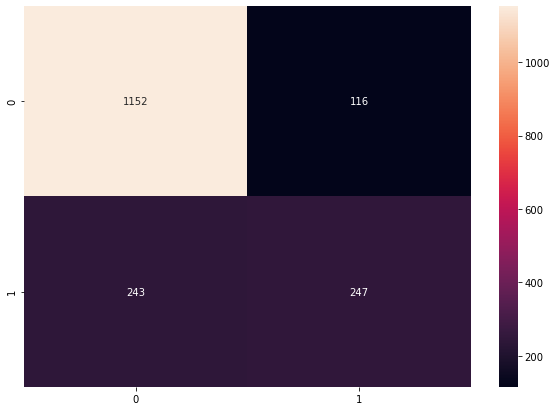

In [92]:
# Build the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))
print("Precsison: %.4f" %precision_score(Y_test, y_pred))
print("Recall: %.4f" %recall_score(Y_test, y_pred))
print("F1 Score: %.4f" %f1_score(Y_test, y_pred))

## - Decesion Tree

In [93]:
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

In [94]:
# Predicting test set
y_pred = model_tree.predict(X_test)

In [96]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.7178612059158134
0.4939516129032258
0.5
0.4969574036511156


* Logistic regression is performing much better in overall performance

In [98]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y =Y_train, cv =10)

In [99]:
accuracies

array([0.79734848, 0.79356061, 0.80681818, 0.81818182, 0.82732448,
       0.79127135, 0.78747628, 0.78368121, 0.80075901, 0.79127135])

In [102]:
# Analyzing Coefficients
df=pd.concat([pd.DataFrame(X_train.columns, columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], 
                                                                              axis = 1)

In [103]:
df = df.sort_values('Coef', ascending=False)

In [105]:
df.head(10)

,features,Coef
25,tenure_group_Tenure_0-12,1.117518
16,InternetService_Fiber optic,0.850215
18,Contract_Month-to-month,0.809294
11,PaperlessBilling,0.346691
10,StreamingMovies,0.322539
9,StreamingTV,0.242519
23,PaymentMethod_Electronic check,0.232843
1,SeniorCitizen,0.213098
14,MultipleLines_Yes,0.133464
13,MultipleLines_No phone service,0.103807


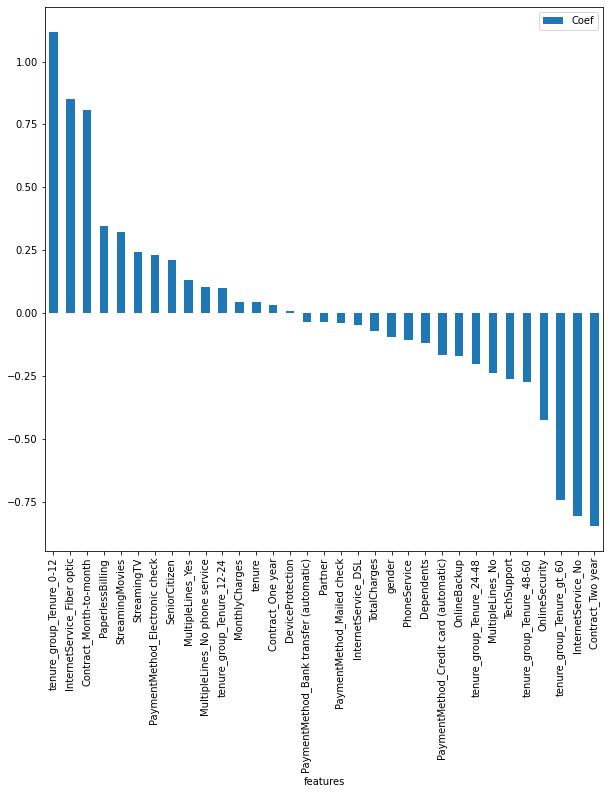

In [106]:
ax = df.plot.bar(x='features', y='Coef', figsize=(10,10))

## Optimzing the baseline - Feature Seclection/Feature Engineering on Logistic regression

In [107]:
from sklearn.feature_selection import RFE 
classifier = LogisticRegression()
rfe = RFE(classifier, 10)
rfe = rfe.fit(X_train, Y_train)

In [108]:
X_train.columns[rfe.support_]

Index(['OnlineSecurity', 'StreamingMovies', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'tenure_group_Tenure_0-12',
       'tenure_group_Tenure_gt_60'],
      dtype='object')

In [117]:
X_test.columns[rfe.support_]

Index(['OnlineSecurity', 'StreamingMovies', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'tenure_group_Tenure_0-12',
       'tenure_group_Tenure_gt_60'],
      dtype='object')

In [113]:
# Run the logistic model again
classifier = LogisticRegression(random_state = 2)
classifier.fit(X_train[X_train.columns[rfe.support_]], Y_train)

LogisticRegression(random_state=2)

In [115]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.7178612059158134
0.4939516129032258
0.5
0.4969574036511156


## Final results

In [119]:
final_results = pd.concat([Y_test, telcom.customerID], axis =1).dropna()

In [122]:
final_results['predicted_churn'] = y_pred

In [123]:
final_results

,Churn,customerID,predicted_churn
2,1.0,3668-QPYBK,0
3,0.0,7795-CFOCW,0
4,1.0,9237-HQITU,0
12,0.0,8091-TTVAX,0
25,0.0,6865-JZNKO,1
...,...,...,...
7025,0.0,2823-LKABH,0
7032,1.0,6894-LFHLY,0
7034,1.0,0639-TSIQW,1
7040,0.0,4801-JZAZL,0


In [130]:
final_results = final_results[['customerID', 'Churn', 'predicted_churn']].reset_index(drop = True)

In [131]:
final_results

,customerID,Churn,predicted_churn
0,3668-QPYBK,1.0,0
1,7795-CFOCW,0.0,0
2,9237-HQITU,1.0,0
3,8091-TTVAX,0.0,0
4,6865-JZNKO,0.0,1
...,...,...,...
1753,2823-LKABH,0.0,0
1754,6894-LFHLY,1.0,0
1755,0639-TSIQW,1.0,1
1756,4801-JZAZL,0.0,0
